## Importing libraries

In [271]:
import pandas as pd # for data exploration
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns 
import numpy as np

## Uploading and reading the data

We will be moving with TRAIN_SET_2021 and TEST_SET_2021 to ensure that all the preprocessing and processing are done in both

In [272]:
# uploading the data
testset=pd.read_csv("TEST_SET_2021.csv", index_col=0)
trainset=pd.read_csv("TRAIN_SET_2021.csv", index_col=0)

In [273]:
pd.set_option("display.max_columns", None) # display all columns
# reading the data
trainset.head()

,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
RESTAURANT_SERIAL_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,
DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.959983,13.004886,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.719365,3.922086,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.442637,10.312777,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.988293,4.163975,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.980282,13.462786,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


# Data Exploration

## About the data

As mentionned in the inspection report, we have four different categories of violation: Imminent Health Hazard, critical, major, and noon-major. All of them depend on the NUMBER OF VIOLATIONS because, restaurants may commit several violations in each inpection.We have two types of inspection:routine inspection and re-inspection. The demerit’s number varies based on the importance of the type of violation. Each inspection has a grade based on demerits and identical consecutive violations.


## Getting the size of the data (number of rows and number of columns)

In [274]:
print(testset.shape) # checking the size of the testset
print(trainset.shape) # checking the size of the trainset

(7505, 26)
(15673, 27)


We have around 15k rows and 28 features

##  Getting the data type for each feature

In [275]:
trainset.dtypes # checking the type of the data

RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                 float64
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                     float64
FIRST_VIOLATION_TYPE            

The 'FIRST VIOLATION', 'SECOND VIOLATION' and  'THIRD VIOLATION' represent the different forms of violations. For each form of violation, we have the percentage of restaurant which have commited it. Those variales must be nominal variables.

### Having a view on values within the variables mentioned above to detect inconsistence ones.

In [276]:
# Number of occurence of unique values for each variable in the violation_var
violation_var=['FIRST_VIOLATION','SECOND_VIOLATION','THIRD_VIOLATION']
for varia in violation_var:
    a=trainset[varia].value_counts()
    print(a)                                        
    print('-------------------------------------')

202.0        2869
209.0        1467
211.0        1436
214.0        1211
206.0         971
             ... 
301.0           3
17.0            2
15.0            2
8675309.0       1
3.0             1
Name: FIRST_VIOLATION, Length: 68, dtype: int64
-------------------------------------
211.0    1602
209.0    1433
215.0    1180
214.0    1136
212.0     903
         ... 
10.0        2
15.0        2
61.0        1
8.0         1
301.0       1
Name: SECOND_VIOLATION, Length: 73, dtype: int64
-------------------------------------
215.0    1382
211.0    1116
233.0    1113
230.0     862
213.0     785
         ... 
309.0       1
39.0        1
62.0        1
306.0       1
61.0        1
Name: THIRD_VIOLATION, Length: 80, dtype: int64
-------------------------------------


Some values have very low occurence

### Converting the mentioned variables above from numerical variables to categorical variables

In [277]:
testset['FIRST_VIOLATION'] = pd.Categorical(testset.FIRST_VIOLATION)
testset['SECOND_VIOLATION'] = pd.Categorical(testset.SECOND_VIOLATION)
testset['THIRD_VIOLATION'] = pd.Categorical(testset.THIRD_VIOLATION)

In [278]:
trainset['FIRST_VIOLATION'] = pd.Categorical(trainset.FIRST_VIOLATION)
trainset['SECOND_VIOLATION'] = pd.Categorical(trainset.SECOND_VIOLATION)
trainset['THIRD_VIOLATION'] = pd.Categorical(trainset.THIRD_VIOLATION)

variables as NEXT INSPECTION GRADE C OR BELOW, NUMBER OF VIOLATIONS and INSPECTION DEMERITS are categorical or there should be numerical. Let's convert them into numarical but before doing that, we will first check if there contain outliers.

### Checking outliers

In [279]:
# Counting unique values in each feature
columns=['NEXT_INSPECTION_GRADE_C_OR_BELOW','NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS','INSPECTION_TYPE','CURRENT_GRADE','SECOND_VIOLATION','THIRD_VIOLATION','EMPLOYEE_COUNT','CURRENT_DEMERITS']
for col in columns:
    var=trainset[col].value_counts(normalize=True)
    print(var)
    print('---------------------------------------------------')
    

0       0.840722
1       0.158895
-3      0.000064
3       0.000064
7       0.000064
9       0.000064
Goat    0.000064
4       0.000064
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: float64
---------------------------------------------------
3         0.239809
4         0.225039
5         0.129386
6         0.111326
7         0.079399
8         0.063919
9         0.040699
10        0.031411
11        0.021414
12        0.017608
13        0.012384
14        0.008514
15        0.006772
16        0.004450
17        0.002580
18        0.001741
19        0.001096
20        0.000580
23        0.000387
22        0.000387
21        0.000322
24        0.000258
25        0.000258
30        0.000064
28        0.000064
Nevada    0.000064
42        0.000064
Name: NUMBER_OF_VIOLATIONS, dtype: float64
---------------------------------------------------
10    0.123938
9     0.116220
7     0.074908
19    0.074454
20    0.074000
        ...   
77    0.000065
56    0.000065
70    0.000065
62    0.000065

We can from the above tables that we have some values such as 'Routine Inspection' in the INSPECTION DEMERITS column,'Nevada' in the NUMBER OF VIOLATIONS column and all other values different from '0' and '1' in the NEXT INSPECTION GRADE C OR BELOW column and also some values in other variables that should be removed.

### Handling outliers

In [280]:
# delete noises from the variables mentioned aove
trainset = trainset[(trainset.NUMBER_OF_VIOLATIONS !='Nevada')]
trainset = trainset[(trainset.INSPECTION_DEMERITS !='Routine Inspection')]
trainset = trainset[trainset['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(["0", "1"])]
trainset = trainset[trainset['CURRENT_GRADE'].isin(["A", "B", "C", "X", "O", "N"])]
trainset = trainset[trainset['INSPECTION_TYPE'].isin(["Routine Inspection", "Re-inspection"])] 

In [281]:
testset = testset[(testset.NUMBER_OF_VIOLATIONS !='Nevada')]
testset = testset[(testset.INSPECTION_DEMERITS !='Routine Inspection')]
testset = testset[testset['CURRENT_GRADE'].isin(["A", "B", "C", "X", "O", "N"])]
testset = testset[testset['INSPECTION_TYPE'].isin(["Routine Inspection", "Re-inspection"])] 

We have deleted all values considered as noises as mentioned above

### Converting variables from categorical to numerical

In [282]:
trainset['NUMBER_OF_VIOLATIONS']=pd.to_numeric(trainset['NUMBER_OF_VIOLATIONS'])
trainset['INSPECTION_DEMERITS']=pd.to_numeric(trainset['INSPECTION_DEMERITS'])
trainset['NEXT_INSPECTION_GRADE_C_OR_BELOW']=pd.to_numeric(trainset['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

In [283]:
testset['NUMBER_OF_VIOLATIONS']=pd.to_numeric(testset['NUMBER_OF_VIOLATIONS'])
testset['INSPECTION_DEMERITS']=pd.to_numeric(testset['INSPECTION_DEMERITS'])

## Checking the unique variables

In [284]:
trainset.nunique(axis=0)

RESTAURANT_PERMIT_NUMBER             8474
RESTAURANT_NAME                      8142
RESTAURANT_LOCATION                  4879
RESTAURANT_CATEGORY                    31
ADDRESS                              4714
CITY                                   27
STATE                                  12
ZIP                                  2458
CURRENT_DEMERITS                       46
CURRENT_GRADE                           6
EMPLOYEE_COUNT                         51
MEDIAN_EMPLOYEE_AGE                 14728
MEDIAN_EMPLOYEE_TENURE              14804
INSPECTION_TIME                     13779
INSPECTION_TYPE                         2
INSPECTION_DEMERITS                    63
VIOLATIONS_RAW                      11057
RECORD_UPDATED                       4764
LAT_LONG_RAW                         4647
FIRST_VIOLATION                        68
SECOND_VIOLATION                       73
THIRD_VIOLATION                        79
FIRST_VIOLATION_TYPE                    7
SECOND_VIOLATION_TYPE             

Restaurant serial number has 15673 unique values which is equal to the size of the all dataframe. So it's the key variable

In [285]:
trainset.head()

,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
RESTAURANT_SERIAL_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,
DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.959983,13.004886,11/5/2013 16:15,Routine Inspection,11.0,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4.0,0
DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.719365,3.922086,9/21/2012 13:00,Routine Inspection,9.0,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5.0,0
DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.442637,10.312777,9/16/2011 11:50,Routine Inspection,9.0,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3.0,1
DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.988293,4.163975,11/22/2011 11:40,Routine Inspection,5.0,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3.0,0
DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.980282,13.462786,11/9/2012 20:30,Routine Inspection,5.0,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


## Looking at the missing values

In [286]:
trainset.isnull().sum().sum()*100/len(trainset) # percentage of missing values in the all dataframe

22.051417969785316

In [287]:
testset.isnull().sum().sum()*100/len(testset) # percentage of missing values in the all dataframe

0.05334044539271903

We have a biais data because around 22% of the trainset is missing. Dropping them will significantly reduice the size of the trainset and may lead to overfitting

### Paying attention to which data is missing.

In [288]:
trainset.isna().sum()*100/len(trainset) # computing the percentage of missing values for each variable

RESTAURANT_PERMIT_NUMBER            0.000000
RESTAURANT_NAME                     0.404188
RESTAURANT_LOCATION                 1.292075
RESTAURANT_CATEGORY                 0.821627
ADDRESS                             0.404188
CITY                                1.484230
STATE                               1.345083
ZIP                                 0.357805
CURRENT_DEMERITS                    1.371588
CURRENT_GRADE                       0.000000
EMPLOYEE_COUNT                      0.602968
MEDIAN_EMPLOYEE_AGE                 0.225285
MEDIAN_EMPLOYEE_TENURE              1.908296
INSPECTION_TIME                     1.159555
INSPECTION_TYPE                     0.000000
INSPECTION_DEMERITS                 1.636629
VIOLATIONS_RAW                      1.046912
RECORD_UPDATED                      0.761993
LAT_LONG_RAW                        0.092764
FIRST_VIOLATION                     1.351710
SECOND_VIOLATION                    0.530082
THIRD_VIOLATION                     0.390936
FIRST_VIOL

Except the key variable and the restaurant permit number, all other features have some missing values.


In [289]:
## testset
testset.isna().sum()*100/len(testset) # computing the percentage of missing values for each variable

RESTAURANT_PERMIT_NUMBER    0.000000
RESTAURANT_NAME             0.000000
RESTAURANT_LOCATION         0.000000
RESTAURANT_CATEGORY         0.000000
ADDRESS                     0.000000
CITY                        0.013335
STATE                       0.000000
ZIP                         0.000000
CURRENT_DEMERITS            0.000000
CURRENT_GRADE               0.000000
INSPECTION_TIME             0.040005
INSPECTION_TYPE             0.000000
INSPECTION_DEMERITS         0.000000
VIOLATIONS_RAW              0.000000
RECORD_UPDATED              0.000000
LAT_LONG_RAW                0.000000
FIRST_VIOLATION             0.000000
SECOND_VIOLATION            0.000000
THIRD_VIOLATION             0.000000
FIRST_VIOLATION_TYPE        0.000000
SECOND_VIOLATION_TYPE       0.000000
THIRD_VIOLATION_TYPE        0.000000
NUMBER_OF_VIOLATIONS        0.000000
EMPLOYEE_COUNT              0.000000
MEDIAN_EMPLOYEE_AGE         0.000000
MEDIAN_EMPLOYEE_TENURE      0.000000
dtype: float64

## Highlighting relevant features

### Looking at the describe statisque

In [290]:
trainset.describe()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
count,14885.000000,15001.000000,15058.000000,14804.000000,14845.000000,14928.000000,15092.000000
mean,5.061538,22.466969,28.019678,4.028681,13.567464,5.732516,0.159621
std,5.196590,909.852025,4.900757,2.012819,8.494382,3.019764,0.366266
min,0.000000,-7.000000,18.000000,0.227197,0.000000,3.000000,0.000000
25%,0.000000,8.000000,24.604570,2.551504,8.000000,4.000000,0.000000
50%,5.000000,14.000000,27.976789,3.691857,10.000000,5.000000,0.000000
75%,8.000000,21.000000,31.414685,5.144538,19.000000,7.000000,0.000000
max,100.000000,111447.000000,49.614076,16.481163,86.000000,42.000000,1.000000


From the describe statistic table, we can see that the EMPLOYEE COUNT might contain most of informations of data. From the range between the minimum and the maximum of each variable, we can also see that the EMPLOYEE COUNT is making the data to be biais. We should do a standardization of the data

In [291]:
## testset
testset.describe()

,CURRENT_DEMERITS,INSPECTION_DEMERITS,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,123.820376,15.386585,5.749033,15.554238,28.030278,3.973108
std,10275.005838,8.887746,3.040881,9.113841,4.915108,2.000084
min,-37.000000,0.000000,3.000000,3.000000,18.000000,0.346602
25%,0.000000,9.000000,4.000000,8.102576,24.581599,2.516199
50%,5.000000,14.000000,5.000000,14.954705,27.934639,3.654193
75%,8.000000,20.000000,7.000000,21.729778,31.348883,5.047100
max,889787.000000,82.000000,30.000000,54.239484,49.245972,20.197675


## To know more about the data, let's visualize some variables

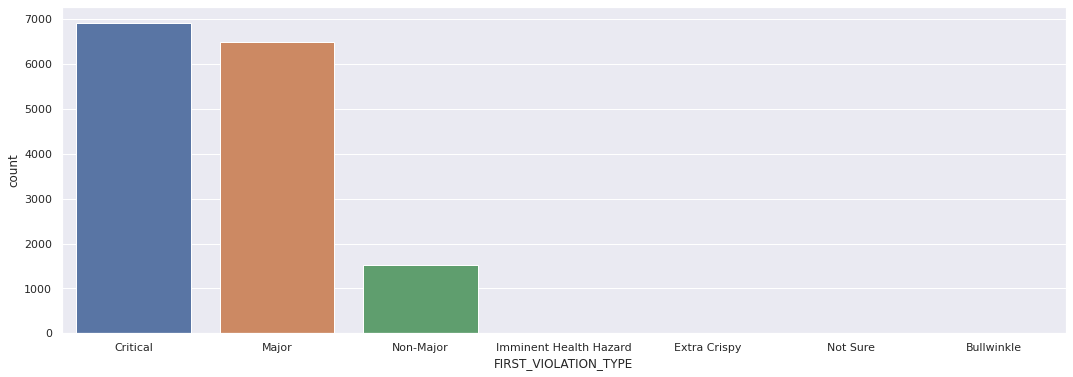

In [292]:
## count plot First Violation type
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="FIRST_VIOLATION_TYPE", data=trainset)

From the above plot, we can see that restaurants are most commited the Critical and the Major violations in the FIRST VIOLATION TYPE. Some other violations such as Extra Crispy, Major-ish, Not Sure, Excellent and Bullwinkle are considered as outliers since we have only four types of violations.

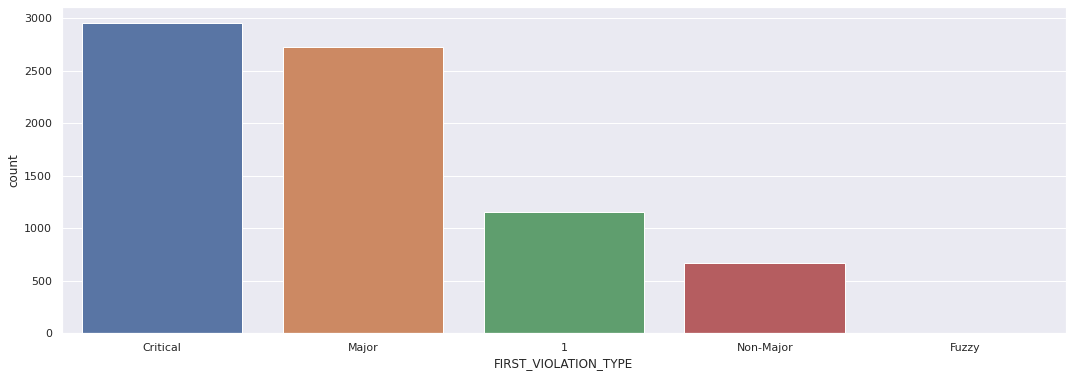

In [293]:
## testset
#count plot first violation type testset
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="FIRST_VIOLATION_TYPE", data=testset)

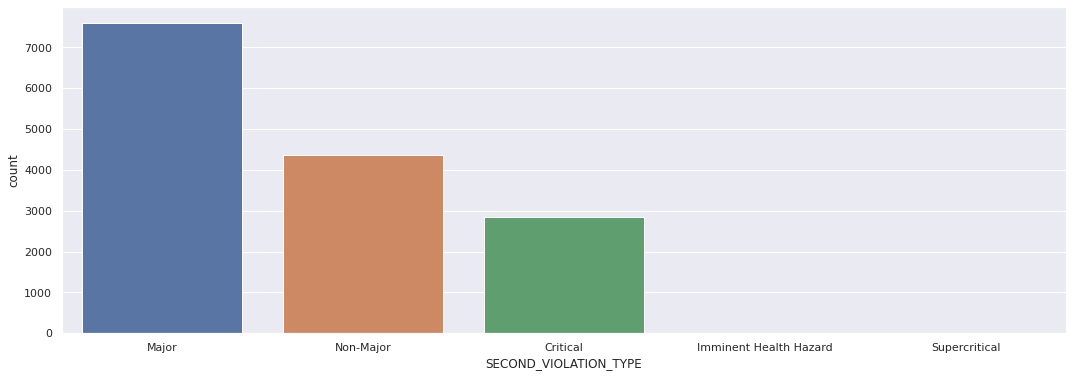

In [294]:
## count plot Second Violation type
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="SECOND_VIOLATION_TYPE", data=trainset)

From the above plot, we can see that restaurants are most commited the Major violation in the SECOND VIOLATION TYPE. Some other violations such as Supercritical and Kitchen Nightmares are considered as outliers.

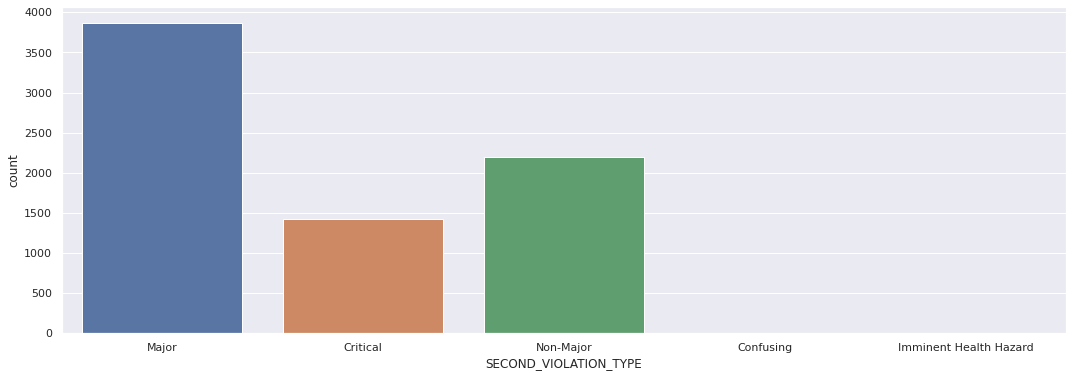

In [295]:
## testset
#count plot Second Violation type testset
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax= sns.countplot(x="SECOND_VIOLATION_TYPE", data=testset)

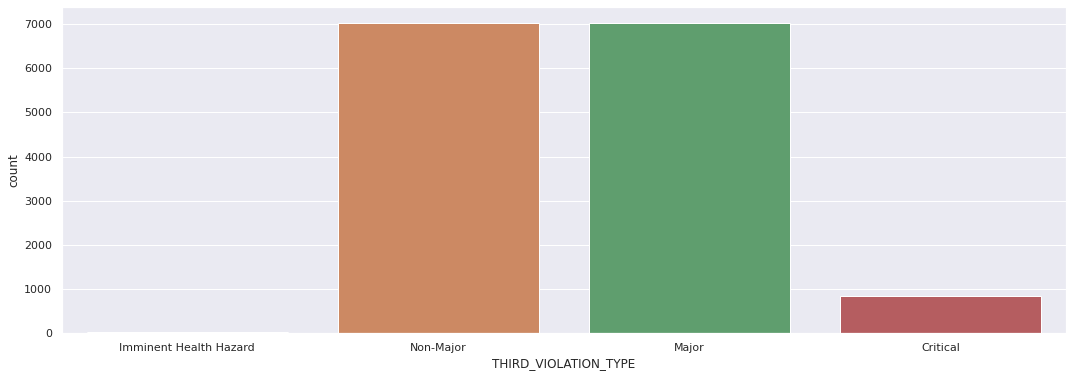

In [296]:
# count plot Third Violation type
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="THIRD_VIOLATION_TYPE", data=trainset)

From the above plot, we can see that restaurants are commited the Non-Major and the Major violations at almonst with the same intensity in the FIRST VIOLATION TYPE.
From the above graphs, since the imminent Health Hazard is very few in all the VIOLATION TYPE, we will drop it to improve the performance of our model.

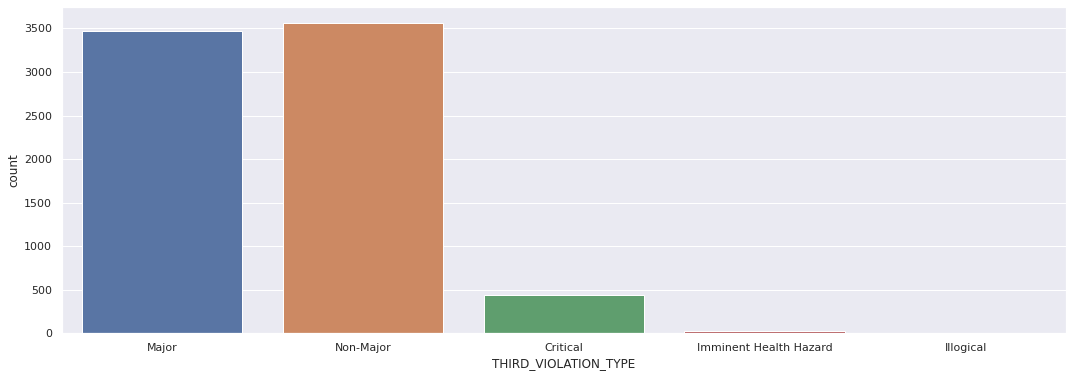

In [297]:
## testset
#count plot Third Violation type testset
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="THIRD_VIOLATION_TYPE", data=testset)

## Handling outliers in the violation category

In [298]:
# filtering out non significant values
trainset = trainset[trainset['FIRST_VIOLATION_TYPE'].isin(["Critical", "Major",'Non-Major','Imminent Health Hazard'])]
trainset = trainset[trainset['SECOND_VIOLATION_TYPE'].isin(["Critical", "Major",'Non-Major','Imminent Health Hazard')]
trainset.shape

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-298-ff3bdd2d6bc4>, line 3)

In [ ]:
# filtering out non significant values in the testset
testset = testset[testset['FIRST_VIOLATION_TYPE'].isin(["Critical", "Major",'Non-Major','Imminent Health Hazard'])]
testset = testset[testset['SECOND_VIOLATION_TYPE'].isin(["Critical", "Major",'Non-Major','Imminent Health Hazard'])]
testset.shape

What we are doing it's to take only in conseration the four different form of violations as mentioned in the form.

### Computing the correlation matrix

In [ ]:
trainset_corr_mat=trainset.corr('pearson') # correlation with pearson on numerical variables
trainset_corr_mat

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(trainset_corr_mat,cmap='coolwarm',annot=True)

We have strong positive correlation between SECOND VIOLATION and THIRD VIOLATION and also between INSPECTION DEMERITS and NUMBER OF VIOLATIONS. To avoid redundant information we should drop out THIRD VIOLATION because it has lower standart deviation(less informations) than SECOND VIOLATION.In the way we will drop out NUMBER OF VIOLATION.

In [ ]:
#  Selected features
key_variable= ['RESTAURANT_SERIAL_NUMBER']
continuous_variables = ['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE']
nominal_variables = ['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE',
                    'INSPECTION_TYPE','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE','FIRST_VIOLATION','SECOND_VIOLATION']
numeric_variables = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT','INSPECTION_DEMERITS','MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE']
target_variable = ['NEXT_INSPECTION_GRADE_C_OR_BELOW']
relevant_features=nominal_variables + numeric_variables + target_variable
categorical=nominal_variables+target_variable
categorical_test=nominal_variables

In [ ]:
new_trainset= trainset[relevant_features] 
# new_trainset=new_trainset.set_index('RESTAURANT_SERIAL_NUMBER')
new_trainset.head()

In [ ]:
new_testset= testset[nominal_variables + numeric_variables] 
#new_testset=new_testset.set_index('RESTAURANT_SERIAL_NUMBER')
#new_testset.head()

### Handling missing values

In [ ]:
# Filtering all restaurants in the TRAIN_SET with NaN in the CITY variable
new_trainset[new_trainset['CITY'].isna()]

We have around 200 missing values in the CITY column in the trainset

In [ ]:
## testset
## Filtering all restaurants in the TEST_SET with NaN in the CITY variable
new_testset[new_testset['CITY'].isna()]

In [ ]:
# counting unique values in the CITY column
most_frequent_city = new_trainset.CITY.value_counts().index[0]
new_trainset.CITY.value_counts()

From the above table, we can see that only few values in the CITY variable are significant.
For the next step we will consider only "Las Vegas",  "Henderson", 'North Las Vegas ', 'Laughlin', 'Mesquite', 'Boulder City ', 'Primm'   values and drop the other

In [ ]:
## testset
most_frequent_city = new_testset.CITY.value_counts().index[0]
new_testset.CITY.value_counts()

The most frequent city is 'Las Vegas'. In the testset, we will fill NaN value in CITY with "Last Vegas" and we will drop them in trainset.

#### Dropping cities with very few occurence

In [ ]:
trainset = trainset[trainset['CITY'].isin(["Las Vegas", "Henderson",'North Las Vegas ','Laughlin','Mesquite','Boulder City ','Primm'])]
##testset
new_testset = new_testset[new_testset['CITY'].isin(["Las Vegas", "Henderson",'North Las Vegas ','Laughlin','Mesquite','Boulder City ','Primm'])]

In [ ]:
# replacing NaN by 'Last Vegas' in the testset
new_testset.at[new_testset['CITY'].isna(), 'CITY'] = most_frequent_city

### Dropping NaN values in the TRAIN_SET

In [ ]:
new_trainset=new_trainset.dropna()
new_trainset.head()

### Standardization of the data (Z-score)

In [ ]:
# standardizing by computing the Z-score
def standardize(row):
    new_row = (row-row.mean())/ (row.std())
    return new_row
trainset_std = new_trainset[numeric_variables].apply(standardize)
trainset_std.head()

In [ ]:
# standardizing by computing the Z-score testset
def standardize(row):
    new_row = (row-row.mean())/ (row.std())
    return new_row
testset_std = new_testset[numeric_variables].apply(standardize)
#testset_std

We did a standardization to put variables at the same scale in order for them to equaly contribute for the data analysis

### Merging the standardize matrix with the matrix with categorical variable

In [299]:
new_trainset_std = trainset_std.merge(new_trainset[categorical], on='RESTAURANT_SERIAL_NUMBER')
##testset
new_testset_std = testset_std.merge(new_testset[categorical_test], on='RESTAURANT_SERIAL_NUMBER')
new_trainset_std.head()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_GRADE,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,FIRST_VIOLATION,SECOND_VIOLATION,NEXT_INSPECTION_GRADE_C_OR_BELOW
RESTAURANT_SERIAL_NUMBER,,,,,,,,,,,,,,,,
DA1117270,-0.972171,0.001382,-0.303849,-0.011258,4.434758,Snack Bar,Las Vegas,Nevada,A,Routine Inspection,Critical,Major,Imminent Health Hazard,204.0,215.0,0
DA1014948,-0.393969,-0.016996,-0.540153,-0.060539,-0.056755,Restaurant,Las Vegas,Nevada,A,Routine Inspection,Major,Major,Non-Major,214.0,216.0,0
DA0861994,0.569701,-0.000660,-0.540153,-0.322026,3.103490,Restaurant,Las Vegas,Nevada,A,Routine Inspection,Critical,Major,Non-Major,202.0,215.0,1
DA0896719,-0.972171,-0.009849,-1.012761,1.223399,0.062861,Elementary School Kitchen,Las Vegas,Nevada,A,Routine Inspection,Major,Non-Major,Non-Major,214.0,230.0,0
DA1031041,-0.972171,-0.013933,-1.012761,-1.235960,4.661193,Bar / Tavern,Las Vegas,Nevada,A,Routine Inspection,Major,Non-Major,Non-Major,214.0,230.0,0


We are merging to have our new dataframe

## Binarization of nominal features

In [300]:
for i in nominal_variables:
        dummies = pd.get_dummies(new_trainset_std[i], prefix=i, drop_first=False)
        new_trainset_std = pd.concat([new_trainset_std, dummies], axis=1)
## testset        
        dummies = pd.get_dummies(new_testset_std[i], prefix=i, drop_first=False)
        new_testset_std = pd.concat([new_testset_std, dummies], axis=1)
        
#new_trainset_std.head()
new_testset_std.head()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_GRADE,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,FIRST_VIOLATION,SECOND_VIOLATION,RESTAURANT_CATEGORY_Bakery Sales,RESTAURANT_CATEGORY_Banquet Kitchen,RESTAURANT_CATEGORY_Banquet Support,RESTAURANT_CATEGORY_Bar / Tavern,RESTAURANT_CATEGORY_Barbeque,RESTAURANT_CATEGORY_Beer Bar,RESTAURANT_CATEGORY_Buffet,RESTAURANT_CATEGORY_Caterer,RESTAURANT_CATEGORY_Childcare Kitchens,RESTAURANT_CATEGORY_Concessions,RESTAURANT_CATEGORY_Confection,RESTAURANT_CATEGORY_Elementary School Kitchen,RESTAURANT_CATEGORY_Farmers Market,RESTAURANT_CATEGORY_Food Trucks / Mobile Vendor,RESTAURANT_CATEGORY_Garde Manger,RESTAURANT_CATEGORY_Grocery Store Sampling,RESTAURANT_CATEGORY_Institutional Food Service,RESTAURANT_CATEGORY_Kitchen Bakery,RESTAURANT_CATEGORY_Main Kitchen,RESTAURANT_CATEGORY_Meat/Poultry/Seafood,RESTAURANT_CATEGORY_Pantry,RESTAURANT_CATEGORY_Portable Bar,RESTAURANT_CATEGORY_Portable Unit,RESTAURANT_CATEGORY_Produce Market,RESTAURANT_CATEGORY_Restaurant,RESTAURANT_CATEGORY_Self-Service Food Truck,RESTAURANT_CATEGORY_Snack Bar,RESTAURANT_CATEGORY_Special Kitchen,RESTAURANT_CATEGORY_Vegetable Prep,CITY_Henderson,CITY_Las Vegas,CITY_Laughlin,CITY_Mesquite,CITY_Primm,STATE_Nevada,CURRENT_GRADE_A,CURRENT_GRADE_B,CURRENT_GRADE_C,CURRENT_GRADE_N,CURRENT_GRADE_O,CURRENT_GRADE_X,INSPECTION_TYPE_Re-inspection,INSPECTION_TYPE_Routine Inspection,FIRST_VIOLATION_TYPE_Critical,FIRST_VIOLATION_TYPE_Major,FIRST_VIOLATION_TYPE_Non-Major,SECOND_VIOLATION_TYPE_Critical,SECOND_VIOLATION_TYPE_Major,SECOND_VIOLATION_TYPE_Non-Major,THIRD_VIOLATION_TYPE_Critical,THIRD_VIOLATION_TYPE_Imminent Health Hazard,THIRD_VIOLATION_TYPE_Major,THIRD_VIOLATION_TYPE_Non-Major,FIRST_VIOLATION_1.0,FIRST_VIOLATION_2.0,FIRST_VIOLATION_3.0,FIRST_VIOLATION_4.0,FIRST_VIOLATION_5.0,FIRST_VIOLATION_7.0,FIRST_VIOLATION_8.0,FIRST_VIOLATION_9.0,FIRST_VIOLATION_10.0,FIRST_VIOLATION_12.0,FIRST_VIOLATION_13.0,FIRST_VIOLATION_14.0,FIRST_VIOLATION_15.0,FIRST_VIOLATION_16.0,FIRST_VIOLATION_17.0,FIRST_VIOLATION_18.0,FIRST_VIOLATION_19.0,FIRST_VIOLATION_20.0,FIRST_VIOLATION_21.0,FIRST_VIOLATION_22.0,FIRST_VIOLATION_23.0,FIRST_VIOLATION_24.0,FIRST_VIOLATION_25.0,FIRST_VIOLATION_26.0,FIRST_VIOLATION_27.0,FIRST_VIOLATION_28.0,FIRST_VIOLATION_29.0,FIRST_VIOLATION_30.0,FIRST_VIOLATION_31.0,FIRST_VIOLATION_32.0,FIRST_VIOLATION_33.0,FIRST_VIOLATION_34.0,FIRST_VIOLATION_35.0,FIRST_VIOLATION_36.0,FIRST_VIOLATION_37.0,FIRST_VIOLATION_38.0,FIRST_VIOLATION_201.0,FIRST_VIOLATION_202.0,FIRST_VIOLATION_203.0,FIRST_VIOLATION_204.0,FIRST_VIOLATION_205.0,FIRST_VIOLATION_206.0,FIRST_VIOLATION_207.0,FIRST_VIOLATION_208.0,FIRST_VIOLATION_209.0,FIRST_VIOLATION_210.0,FIRST_VIOLATION_211.0,FIRST_VIOLATION_212.0,FIRST_VIOLATION_213.0,FIRST_VIOLATION_214.0,FIRST_VIOLATION_215.0,FIRST_VIOLATION_216.0,FIRST_VIOLATION_217.0,FIRST_VIOLATION_218.0,FIRST_VIOLATION_219.0,FIRST_VIOLATION_220.0,FIRST_VIOLATION_221.0,FIRST_VIOLATION_222.0,FIRST_VIOLATION_223.0,FIRST_VIOLATION_224.0,FIRST_VIOLATION_225.0,FIRST_VIOLATION_226.0,FIRST_VIOLATION_227.0,FIRST_VIOLATION_228.0,FIRST_VIOLATION_229.0,FIRST_VIOLATION_230.0,FIRST_VIOLATION_231.0,FIRST_VIOLATION_301.0,FIRST_VIOLATION_4.57499e+26,SECOND_VIOLATION_2,SECOND_VIOLATION_4,SECOND_VIOLATION_5,SECOND_VIOLATION_7,SECOND_VIOLATION_8,SECOND_VIOLATION_9,SECOND_VIOLATION_10,SECOND_VIOLATION_12,SECOND_VIOLATION_13,SECOND_VIOLATION_14,SECOND_VIOLATION_15,SECOND_VIOLATION_16,SECOND_VIOLATION_17,SECOND_VIOLATION_18,SECOND_VIOLATION_19,SECOND_VIOLATION_20,SECOND_VIOLATION_21,SECOND_VIOLATION_22,SECOND_VIOLATION_23,SECOND_VIOLATION_24,SECOND_VIOLATION_25,SECOND_VIOLATION_26,SECOND_VIOLATION_27,SECOND_VIOLATION_28,SECOND_VIOLATION_29,SECOND_VIOLATION_30,SECOND_VIOLATION_31,SECOND_VIOLATION_32,SECOND_VIOLATION_33,SECOND_VIOLATION_34,SECOND_VIOLATION_35,SECOND_VIOLATION_36,SECOND_VIOLATION_37,SECOND_VIOLATION_38,SECOND_VIOLATION_64

The binarization consists to transform categorical variables to numerical binary variables.
For each variable, we generate new columns with its unique values.
For each new columns, we fill with 0 if that value wasn't represented and with 1 if it was.

In [301]:
new_testset_std.shape, new_trainset_std.shape

((5877, 209), (12946, 240))

Now we want to create a list of variables commun in both trainset and the testset

In [302]:
same_var_train=[]
for i in new_trainset_std.columns:
    if i in new_testset_std.columns:
        same_var_train.append(i)
    else:
        pass
# same_var_test=[]
# for i in new_testset_std.columns:
#     if i not in new_trainset_std.columns:
#         same_var_test.append(i)
#     else:
#         pass
len(same_var_train)

134

In [303]:
new_testset_std[same_var_train].shape

(5877, 134)

What we are doing below it's create another train and test dataframes that will not contain categorical variables, but will have only their commun variales filtered above. 

In [304]:
# dropping initial categorical variables
drop_list=['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE', 'INSPECTION_TYPE','FIRST_VIOLATION_TYPE',
    'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE','FIRST_VIOLATION','SECOND_VIOLATION']

# new_trainset_std.drop(same_var_train[1:]+drop_list, axis=1, inplace=True)
# new_testset_std.drop(drop_list+same_var_test, axis=1,inplace=True)

new_trainset_std = new_trainset_std[same_var_train + ['NEXT_INSPECTION_GRADE_C_OR_BELOW'] ].drop(drop_list, axis=1)
new_testset_std = new_testset_std[same_var_train].drop(drop_list, axis=1)

In [305]:
new_testset_std.shape, new_trainset_std.shape

((5877, 124), (12946, 125))

## Checking inbalance in our target variable

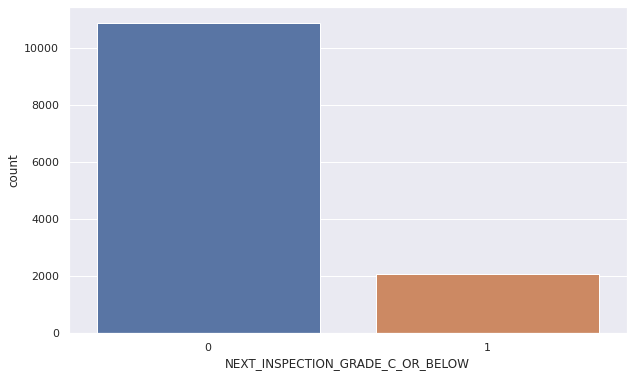

In [306]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="NEXT_INSPECTION_GRADE_C_OR_BELOW", data=new_trainset_std)

From the above graph, we can see that we have imbalanced data and it skewed to the class zero

Let's train some models without resampling the data

In [307]:
# split the data in target variable and other variables
y = new_trainset_std['NEXT_INSPECTION_GRADE_C_OR_BELOW']
X = new_trainset_std.loc[:, new_trainset_std.columns != 'NEXT_INSPECTION_GRADE_C_OR_BELOW']

In [308]:
# split the data in train and test to start training the models
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
score_train =accuracy_score(y_train,y_train_pred)
score_test =accuracy_score(y_test,y_test_pred)

print('Accuracy for train :',score_train,'\nAccuracy for test :',score_test)

Accuracy for train : 0.8390305137118579 
Accuracy for test : 0.8424710424710424


/home/maryse/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNeighbors Classifier

In [310]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_train_pred=classifier.predict(x_train)
y_test_pred=classifier.predict(x_test)
score_train =accuracy_score(y_train,y_train_pred)
score_test =accuracy_score(y_test,y_test_pred)
print('Accuracy for train :',score_train,'\nAccuracy for test :',score_test)


Accuracy for train : 0.8481073773657783 
Accuracy for test : 0.8166023166023166


## Decision Tree

In [311]:
from sklearn import tree
%time
clf_D_T = tree.DecisionTreeClassifier()
clf_D_T.fit(x_train, y_train)
y_train_pred=clf_D_T.predict(x_train)
y_test_pred=clf_D_T.predict(x_test)
score_train =accuracy_score(y_train,y_train_pred)
score_test =accuracy_score(y_test,y_test_pred)
print('Accuracy for train :',score_train,'\nAccuracy for test :',score_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.3 µs
Accuracy for train : 1.0 
Accuracy for test : 0.7223938223938224


## Random Forest

In [312]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Create a Gaussian Classifier
clf_R=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_R.fit(x_train,y_train)
y_train_pred=clf_R.predict(x_train)
y_test_pred=clf_R.predict(x_test)
score_train =accuracy_score(y_train,y_train_pred)
score_test =accuracy_score(y_test,y_test_pred)
print('Accuracy for train :',score_train,'\nAccuracy for test :',score_test)

Accuracy for train : 1.0 
Accuracy for test : 0.8409266409266409


We train different model such as Random Forest, Decision Tree, KNeighbors Classifier and Logistic Regression. From the accuracy we can suspect Logistic Regression as the best model. We made need to have a look at some analysis matric such as, recall, f1-score, precision

# Prediction on the TEST SET dataframe

## Prediction using Logistic Regression

In [313]:
# classicolumnsr prediction
test_pred = clf.predict(new_testset_std)
# clissifier probability
test_pred_prob = clf.predict_proba(new_testset_std)

In [314]:
# create our new two variables
new_testset_std['CLASSIFIER_PREDICTION'] = test_pred
new_testset_std['CLASSIFIER_PROBABILITY'] = np.where(test_pred==1, test_pred_prob[:, 1], test_pred_prob[:, 0])

In [315]:
np.where(test_pred==1, test_pred_prob[:, 1], test_pred_prob[:, 0])

array([0.87237005, 0.89887269, 0.82882896, ..., 0.82432937, 0.89042181,
       0.83697298])

In [316]:
predictions = new_testset_std[['CLASSIFIER_PROBABILITY','CLASSIFIER_PREDICTION']]
# predictions = new_testset_std.reset_index()[['RESTAURANT_SERIAL_NUMBER','CLASSIFIER_PROBABILITY','CLASSIFIER_PREDICTION']]
predictions

,CLASSIFIER_PROBABILITY,CLASSIFIER_PREDICTION
RESTAURANT_SERIAL_NUMBER,,
DA1050454,0.872370,0
DA0986444,0.898873,0
DA1004708,0.828829,0
DA1438012,0.859488,0
DA0941666,0.752597,0
...,...,...
DA0627566,0.832304,0
DA0922689,0.813484,0
DA1031095,0.824329,0


In [317]:
predictions.to_csv('Predictions_Kemme_Aurelie.csv', index=True)

In [318]:
features = new_trainset_std.columns
importances = clf_R.feature_importances_
indices = list(np.argsort(importances))
indices = indices[:10] + indices[-10:]

for i in indices:
    print(features[i], ':', importances[i])

FIRST_VIOLATION_301.0 : 0.0
FIRST_VIOLATION_3.0 : 0.0
RESTAURANT_CATEGORY_Self-Service Food Truck : 0.0
FIRST_VIOLATION_17.0 : 1.6128572860361256e-06
FIRST_VIOLATION_15.0 : 3.2779995279620493e-06
FIRST_VIOLATION_37.0 : 1.54305594639508e-05
FIRST_VIOLATION_29.0 : 1.684547641453692e-05
FIRST_VIOLATION_231.0 : 1.737263149181825e-05
FIRST_VIOLATION_32.0 : 1.962265579813486e-05
FIRST_VIOLATION_26.0 : 2.1496639927088376e-05
THIRD_VIOLATION_TYPE_Non-Major : 0.007967412010841383
CITY_Henderson : 0.010193873332309185
THIRD_VIOLATION_TYPE_Major : 0.010418420992176025
RESTAURANT_CATEGORY_Restaurant : 0.011203303339043586
CITY_Las Vegas : 0.017166520242805433
CURRENT_DEMERITS : 0.09091344556132203
INSPECTION_DEMERITS : 0.09979198447845858
EMPLOYEE_COUNT : 0.14350953023606233
MEDIAN_EMPLOYEE_AGE : 0.18565812912968535
MEDIAN_EMPLOYEE_TENURE : 0.18770503055116627


In [319]:
# features

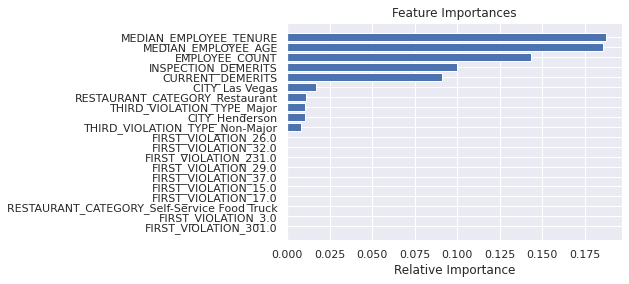

In [320]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Recommendation

The dataset is imbalanced and is skewed to the class zero. The percentage of the skewed is around 83% so it's not allowed to buil an MVP model. But we can still mitigate the skewed of the dataset to build an MVP model by using one of the re-sampling methods such as Oversampling or Undersampling.
The train dataset has around 22% of missing values which significantly reduce it size and bring some inconvenients to Undersampling method. The small size of the test dataset doesn't allow us to apply Oversampling.
The bset way to build an MVP model is either to collect data with both class zero and one and to look at more related features.
According to the above importance features selection plot, we can see that more informations on the Employees, on the type and different form of violation within the violation categorie might improve the accuracy of the model.
More information on the VIOLATION LAw may also improve the model performance

We tried different models such as the Logistic Regression, Random Forest, Decision Tree and K-Neighrest Neighbors. The Logistic Regression seems to be the best with an accuracy on test dataset equals to 84.12%. But this accuracy most be improved with more information as with mentioned above. The accuracy is noy significant because of the skewed of the data, so here, the model is bringing an accuracy to predict zero.
